In [1]:
import sys
import os

%reload_ext autoreload
%autoreload 2

EZAI_ROOT=os.path.join(os.path.expanduser('~'),'projects','ezai')
if not EZAI_ROOT in sys.path:
    sys.path.append(EZAI_ROOT)
import ezai

from ezai.util import util
util.m_info([ezai]) 

ezai 0.1.0-dev


In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import display as ipd

print('Python ', sys.version)
print(sys.executable)

util.m_info([pd,np,mpl,sns])

import math

#import missingno as msno
#util.m_info([msno])

Python  3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]
/opt/conda/envs/ezai/bin/python
pandas 1.1.0
numpy 1.19.1
matplotlib 3.3.0
seaborn 0.10.1


In [11]:
from ezai.data import ritis
from ezai.util import vis_util
from ezai.util import dict_util
from ezai.util import df_util
from ezai.data import temporal

## create data for experiments

In [4]:
config={
    # common configurations
    'n_tx': 24,  # option2:  24 for 5 min, 12 for 10 min and 8 for 15 min
                 # option1:  24 for all
    'n_ty': 2,  # option1:  6,12
    'n_vx': 1,
    'n_vy': 1,
    'n_agg' : 5, #n_tx_step and n_ty_step would be added by config
    'h': 1,
    
    # model configurations - not saved here
    
    # data configurations
    'x_cols' : ['speed'],
    'y_cols' : ['speed'],
    'months' : [],
    'weekdays' : [0,1,2,3,4]
    }

conf=dict_util.DictObj(config)

In [5]:
conf.trim_partial_weeks = True

In [42]:
# note that in n3 data was not geo sorted, hence for new experiments we created geo sorted dataset n3_3 and n3_4

from traffic_flow.experiments.data_prep import *
for source_data in ['pems_d5','samiul_i75']:
    if source_data=='samiul_75':
        conf.setdefault('months', []) #for samiul_75 only
        filetype='csv'
    else:
        conf.setdefault('months', [3,4,5,6,7,8,9,10,11])
        filetype='parquet'
    rd = ritis.RITISDetector(source_data)
    rd = rd.load_raw(kind=('meta','zone'),filetype=filetype)
    rd.info()
    rd.filter_by_common_id()
    rd.info()
    
    for exp_id,n_tx_duration in zip(['n3_3','n3_4'],[0,24]):
        conf.n_tx_duration = n_tx_duration # 0 means same n_tx for all, option 1
                                            # 24 means 24 * 5 = 2 hours, option 2
        expdata_home = os.path.normpath(os.path.join(os.path.expanduser('~'),'traffic_flow_exp',exp_id,'data'))
        n3_build_data(rd,conf, n_adj_id = 6, expdata_home=expdata_home)

# of ids:
road  direction
1     N            14
      S            15
101   N            34
      S            34
17    N             1
      S             1
Name: id, dtype: int64
# of ids after filtering for n_adj_id = 6:
road  direction
1     N            8
      S            8
101   N            8
      S            8
Name: id, dtype: int64
saving id_list.json and <id>.parquet files in 
 /home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-N-1-5
id= 500010093 x,y shapes= (240480, 1) (40080, 1)
id= 500010101 x,y shapes= (240480, 1) (40080, 1)
id= 500010122 x,y shapes= (240480, 1) (40080, 1)
id= 500010142 x,y shapes= (240480, 1) (40080, 1)
id= 500011021 x,y shapes= (240480, 1) (40080, 1)
id= 500011032 x,y shapes= (240480, 1) (40080, 1)
id= 500011052 x,y shapes= (240480, 1) (40080, 1)
id= 500011063 x,y shapes= (240480, 1) (40080, 1)
Saving NPZ and conf.json files:
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-N-1-5/f
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-N-1-5/tf
/home

id= 500010102 x,y shapes= (120240, 3) (40080, 1)
id= 500010121 x,y shapes= (120240, 3) (40080, 1)
id= 500010143 x,y shapes= (120240, 3) (40080, 1)
id= 500011022 x,y shapes= (120240, 3) (40080, 1)
id= 500011033 x,y shapes= (120240, 3) (40080, 1)
id= 500011053 x,y shapes= (120240, 3) (40080, 1)
id= 500011062 x,y shapes= (120240, 3) (40080, 1)
Saving NPZ and conf.json files:
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-S-3-10/f
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-S-3-10/tf
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-S-3-10/sf
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-S-3-10/stf
saving id_list.json and <id>.parquet files in 
 /home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-S-3-15
id= 500010092 x,y shapes= (80160, 3) (40080, 1)
id= 500010102 x,y shapes= (80160, 3) (40080, 1)
id= 500010121 x,y shapes= (80160, 3) (40080, 1)
id= 500010143 x,y shapes= (80160, 3) (40080, 1)
id= 500011022 x,y shapes= (80160, 3) (40080, 1)
id= 500011033 x,y shapes= (80160, 3

/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-S-1-15/tf
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-S-1-15/sf
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-S-1-15/stf
saving id_list.json and <id>.parquet files in 
 /home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-S-3-5
id= 501010023 x,y shapes= (240480, 3) (40080, 1)
id= 501010032 x,y shapes= (240480, 3) (40080, 1)
id= 501010052 x,y shapes= (240480, 3) (40080, 1)
id= 501010062 x,y shapes= (240480, 3) (40080, 1)
id= 501010103 x,y shapes= (240480, 3) (40080, 1)
id= 501010113 x,y shapes= (240480, 3) (40080, 1)
id= 501010132 x,y shapes= (240480, 3) (40080, 1)
id= 501010153 x,y shapes= (240480, 3) (40080, 1)
Saving NPZ and conf.json files:
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-S-3-5/f
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-S-3-5/tf
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-S-3-5/sf
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-S-3-5/stf
saving id_list.json and <id>.pa

/home/armando/traffic_flow_exp/n3_2/data/pems_d5-1-S-1-5/stf
saving id_list.json and <id>.parquet files in 
 /home/armando/traffic_flow_exp/n3_2/data/pems_d5-1-S-1-10
id= 500010092 x,y shapes= (120240, 1) (40080, 1)
id= 500010102 x,y shapes= (120240, 1) (40080, 1)
id= 500010121 x,y shapes= (120240, 1) (40080, 1)
id= 500010143 x,y shapes= (120240, 1) (40080, 1)
id= 500011022 x,y shapes= (120240, 1) (40080, 1)
id= 500011033 x,y shapes= (120240, 1) (40080, 1)
id= 500011053 x,y shapes= (120240, 1) (40080, 1)
id= 500011062 x,y shapes= (120240, 1) (40080, 1)
Saving NPZ and conf.json files:
/home/armando/traffic_flow_exp/n3_2/data/pems_d5-1-S-1-10/f
/home/armando/traffic_flow_exp/n3_2/data/pems_d5-1-S-1-10/tf
/home/armando/traffic_flow_exp/n3_2/data/pems_d5-1-S-1-10/sf
/home/armando/traffic_flow_exp/n3_2/data/pems_d5-1-S-1-10/stf
saving id_list.json and <id>.parquet files in 
 /home/armando/traffic_flow_exp/n3_2/data/pems_d5-1-S-1-15
id= 500010092 x,y shapes= (80160, 1) (40080, 1)
id= 5000101

id= 501010131 x,y shapes= (80160, 3) (40080, 1)
id= 501010152 x,y shapes= (80160, 3) (40080, 1)
Saving NPZ and conf.json files:
/home/armando/traffic_flow_exp/n3_2/data/pems_d5-101-N-3-15/f
/home/armando/traffic_flow_exp/n3_2/data/pems_d5-101-N-3-15/tf
/home/armando/traffic_flow_exp/n3_2/data/pems_d5-101-N-3-15/sf
/home/armando/traffic_flow_exp/n3_2/data/pems_d5-101-N-3-15/stf
saving id_list.json and <id>.parquet files in 
 /home/armando/traffic_flow_exp/n3_2/data/pems_d5-101-S-1-5
id= 501010023 x,y shapes= (240480, 1) (40080, 1)
id= 501010032 x,y shapes= (240480, 1) (40080, 1)
id= 501010052 x,y shapes= (240480, 1) (40080, 1)
id= 501010062 x,y shapes= (240480, 1) (40080, 1)
id= 501010103 x,y shapes= (240480, 1) (40080, 1)
id= 501010113 x,y shapes= (240480, 1) (40080, 1)
id= 501010132 x,y shapes= (240480, 1) (40080, 1)
id= 501010153 x,y shapes= (240480, 1) (40080, 1)
Saving NPZ and conf.json files:
/home/armando/traffic_flow_exp/n3_2/data/pems_d5-101-S-1-5/f
/home/armando/traffic_flow_e

## Verify everything saved correctly

In [48]:
# first list all the folders
for exp_id,source_data in product(['n3_1','n3_2'],['pems_d5','samiul_i75']):
    expdata_home = os.path.normpath(os.path.join(os.path.expanduser('~'),'traffic_flow_exp',exp_id,'data'))
    n_cols = [1,3]
    n_aggs = [5,10,15]
    derived_features = ['f','sf','tf','stf']

    from itertools import product
    from glob import glob

    folders = []
    for n_col,n_agg,derived_feature in product(n_cols,n_aggs,derived_features):
        datafolders = glob(os.path.join(expdata_home, '{}-*-{}-{}/{}'.format(source_data,
                                                                          n_col,
                                                                          n_agg,
                                                                          derived_feature)))
        folders.extend(datafolders[:1])
    display(folders)
    
    for datafolder in folders:
        print(datafolder)
        npz_files = glob(os.path.join(datafolder, '*.npz'))
        conf_files = glob(os.path.join(datafolder, '*-conf.json'))
        for filename in sorted(npz_files)[:1]:
            xy_loaded = np.load(filename)
            print('file=', os.path.basename(filename), 
                  ', shapes=', xy_loaded['x'].shape, xy_loaded['y'].shape)

        for filename in sorted(conf_files)[:1]:
            conf = dict_util.DictObj(filename)
            print('file=', os.path.basename(filename), 
                  'zid=', conf.id, 
                  ', shapes=', conf.n_tx, ',',conf.n_vx, 'and', conf.n_ty, '*', conf.n_vy)

['/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-N-1-5/f',
 '/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-N-1-5/sf',
 '/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-N-1-5/tf',
 '/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-N-1-5/stf',
 '/home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-N-1-10/f',
 '/home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-N-1-10/sf',
 '/home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-N-1-10/tf',
 '/home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-N-1-10/stf',
 '/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-S-1-15/f',
 '/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-S-1-15/sf',
 '/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-S-1-15/tf',
 '/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-S-1-15/stf',
 '/home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-S-3-5/f',
 '/home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-S-3-5/sf',
 '/home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-S-3-5/tf',
 '/home/armando/t

/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-N-1-5/f
file= 501010031.npz , shapes= (39412, 24, 1) (39412, 2)
file= 501010031-conf.json zid= 501010031 , shapes= 24 , 1 and 2 * 1
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-N-1-5/sf
file= 501010031.npz , shapes= (39412, 24, 3) (39412, 2)
file= 501010031-conf.json zid= 501010031 , shapes= 24 , 3 and 2 * 1
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-N-1-5/tf
file= 501010031.npz , shapes= (39412, 24, 3) (39412, 2)
file= 501010031-conf.json zid= 501010031 , shapes= 24 , 3 and 2 * 1
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-101-N-1-5/stf
file= 501010031.npz , shapes= (39412, 24, 5) (39412, 2)
file= 501010031-conf.json zid= 501010031 , shapes= 24 , 5 and 2 * 1
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-N-1-10/f
file= 500010101.npz , shapes= (38744, 24, 1) (38744, 2)
file= 500010101-conf.json zid= 500010101 , shapes= 24 , 1 and 2 * 1
/home/armando/traffic_flow_exp/n3_1/data/pems_d5-1-N-1-10/sf
file= 50001

['/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-S-1-5/f',
 '/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-S-1-5/sf',
 '/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-S-1-5/tf',
 '/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-S-1-5/stf',
 '/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-N-1-10/f',
 '/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-N-1-10/sf',
 '/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-N-1-10/tf',
 '/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-N-1-10/stf',
 '/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-S-1-15/f',
 '/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-S-1-15/sf',
 '/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-S-1-15/tf',
 '/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-S-1-15/stf',
 '/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-N-3-5/f',
 '/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-N-3-5/sf',
 '/home/arman

/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-S-1-5/f
file= 9816.npz , shapes= (213, 24, 1) (213, 2)
file= 9816-conf.json zid= 9816 , shapes= 24 , 1 and 2 * 1
/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-S-1-5/sf
file= 9816.npz , shapes= (213, 24, 3) (213, 2)
file= 9816-conf.json zid= 9816 , shapes= 24 , 3 and 2 * 1
/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-S-1-5/tf
file= 9816.npz , shapes= (213, 24, 3) (213, 2)
file= 9816-conf.json zid= 9816 , shapes= 24 , 3 and 2 * 1
/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-S-1-5/stf
file= 9816.npz , shapes= (213, 24, 5) (213, 2)
file= 9816-conf.json zid= 9816 , shapes= 24 , 5 and 2 * 1
/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-N-1-10/f
file= 9815.npz , shapes= (213, 12, 1) (213, 2)
file= 9815-conf.json zid= 9815 , shapes= 12 , 1 and 2 * 1
/home/armando/traffic_flow_exp/n3_2/data/samiul_i75-I_75-N-1-10/sf
file= 9815.npz , shapes= (213, 12, 3) (213, 2)
file= 9815-conf.json zid= 9815 

## producing for n3_3, n3_4

In [30]:
# note that in n3 data was not geo sorted, hence for new experiments we created geo sorted dataset n3_3 and n3_4

from traffic_flow.experiments.data_prep import *
for source_data in ['samiul_i75','pems_d5']:
    if source_data=='samiul_i75':
        conf.setdefault('months', []) #for samiul_75 only
        filetype='csv'
    else:
        conf.setdefault('months', [3,4,5,6,7,8,9,10,11])
        filetype='parquet'
    rd = ritis.RITISDetector(source_data)
    rd = rd.load_raw(kind=['zone'],filetype=filetype)
    rd.info()
    rd.filter_by_common_id()
    rd.info()
    
    for exp_id,n_tx_duration in zip(['n3_3','n3_4'],[0,24]):
        conf.n_tx_duration = n_tx_duration # 0 means same n_tx for all, option 1
                                            # 24 means 24 * 5 = 2 hours, option 2
        expdata_home = os.path.normpath(os.path.join(os.path.expanduser('~'),'traffic_flow_exp','data',exp_id))
        n3_build_data(rd,conf, n_adj_id = 6, expdata_home=expdata_home)

---------
meta data
---------
Total records:  1973
Memory usage:  1.1+ MB
---------
No lane data
---------
---------
zone data
---------
Total records:  204953
Memory usage:  74.2+ MB
Unique id:  95
dt stats:
min:  2017-09-04 11:45:00
max:  2017-09-16 23:55:00
unique:  3314
common ids in zone and meta: 95
---------
No event data
---------
---------
meta data
---------
Total records:  95
Memory usage:  49.5+ KB
---------
No lane data
---------
---------
zone data
---------
Total records:  204953
Memory usage:  74.2+ MB
Unique id:  95
dt stats:
min:  2017-09-04 11:45:00
max:  2017-09-16 23:55:00
unique:  3314
common ids in zone and meta: 95
---------
No event data
---------
# of ids:
road  direction
I_75  N            47
      S            48
Name: id, dtype: int64
# of ids after filtering for n_adj_id = 6:
road  direction
I_75  N            8
      S            8
Name: id, dtype: int64
saving id_list.json and <id>.parquet files in 
 /home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_

id= 9829 x,y shapes= (650, 3) (217, 1)
id= 9831 x,y shapes= (650, 3) (217, 1)
id= 9835 x,y shapes= (650, 3) (217, 1)
id= 9893 x,y shapes= (650, 3) (217, 1)
Saving NPZ and conf.json files:
/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-3-10/f
/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-3-10/tf
/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-3-10/sf
/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-3-10/stf
saving id_list.json and <id>.parquet files in 
 /home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-3-15
id= 9816 x,y shapes= (433, 3) (217, 1)
id= 10026 x,y shapes= (433, 3) (217, 1)
id= 9825 x,y shapes= (433, 3) (217, 1)
id= 9823 x,y shapes= (433, 3) (217, 1)
id= 9829 x,y shapes= (433, 3) (217, 1)
id= 9831 x,y shapes= (433, 3) (217, 1)
id= 9835 x,y shapes= (433, 3) (217, 1)
id= 9893 x,y shapes= (433, 3) (217, 1)
Saving NPZ and conf.json files:
/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-3-15/f
/home/armando/traffic

id= 9835 x,y shapes= (1299, 3) (217, 1)
id= 9893 x,y shapes= (1299, 3) (217, 1)
Saving NPZ and conf.json files:
/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-3-5/f
/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-3-5/tf
/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-3-5/sf
/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-3-5/stf
saving id_list.json and <id>.parquet files in 
 /home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-3-10
id= 9816 x,y shapes= (650, 3) (217, 1)
id= 10026 x,y shapes= (650, 3) (217, 1)
id= 9825 x,y shapes= (650, 3) (217, 1)
id= 9823 x,y shapes= (650, 3) (217, 1)
id= 9829 x,y shapes= (650, 3) (217, 1)
id= 9831 x,y shapes= (650, 3) (217, 1)
id= 9835 x,y shapes= (650, 3) (217, 1)
id= 9893 x,y shapes= (650, 3) (217, 1)
Saving NPZ and conf.json files:
/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-3-10/f
/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-3-10/tf
/home/armando/traffic_flow_exp/dat

/home/armando/traffic_flow_exp/data/n3_3/pems_d5-1-S-1-5/stf
saving id_list.json and <id>.parquet files in 
 /home/armando/traffic_flow_exp/data/n3_3/pems_d5-1-S-1-10
id= 500010102 x,y shapes= (120240, 1) (40080, 1)
id= 500010121 x,y shapes= (120240, 1) (40080, 1)
id= 500010092 x,y shapes= (120240, 1) (40080, 1)
id= 500010143 x,y shapes= (120240, 1) (40080, 1)
id= 500011033 x,y shapes= (120240, 1) (40080, 1)
id= 500011022 x,y shapes= (120240, 1) (40080, 1)
id= 500011053 x,y shapes= (120240, 1) (40080, 1)
id= 500011062 x,y shapes= (120240, 1) (40080, 1)
Saving NPZ and conf.json files:
/home/armando/traffic_flow_exp/data/n3_3/pems_d5-1-S-1-10/f
/home/armando/traffic_flow_exp/data/n3_3/pems_d5-1-S-1-10/tf
/home/armando/traffic_flow_exp/data/n3_3/pems_d5-1-S-1-10/sf
/home/armando/traffic_flow_exp/data/n3_3/pems_d5-1-S-1-10/stf
saving id_list.json and <id>.parquet files in 
 /home/armando/traffic_flow_exp/data/n3_3/pems_d5-1-S-1-15
id= 500010102 x,y shapes= (80160, 1) (40080, 1)
id= 5000101

id= 501016142 x,y shapes= (80160, 3) (40080, 1)
id= 501016153 x,y shapes= (80160, 3) (40080, 1)
Saving NPZ and conf.json files:
/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-N-3-15/f
/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-N-3-15/tf
/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-N-3-15/sf
/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-N-3-15/stf
saving id_list.json and <id>.parquet files in 
 /home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-S-1-5
id= 501016082 x,y shapes= (240480, 1) (40080, 1)
id= 501016091 x,y shapes= (240480, 1) (40080, 1)
id= 501016071 x,y shapes= (240480, 1) (40080, 1)
id= 501016102 x,y shapes= (240480, 1) (40080, 1)
id= 501016122 x,y shapes= (240480, 1) (40080, 1)
id= 501016132 x,y shapes= (240480, 1) (40080, 1)
id= 501016143 x,y shapes= (240480, 1) (40080, 1)
id= 501016152 x,y shapes= (240480, 1) (40080, 1)
Saving NPZ and conf.json files:
/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-S-1-5/f
/home/armando/traffic_flow_e

/home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-N-3-5/tf
/home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-N-3-5/sf
/home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-N-3-5/stf
saving id_list.json and <id>.parquet files in 
 /home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-N-3-10
id= 500010101 x,y shapes= (120240, 3) (40080, 1)
id= 500010122 x,y shapes= (120240, 3) (40080, 1)
id= 500010093 x,y shapes= (120240, 3) (40080, 1)
id= 500010142 x,y shapes= (120240, 3) (40080, 1)
id= 500011032 x,y shapes= (120240, 3) (40080, 1)
id= 500011021 x,y shapes= (120240, 3) (40080, 1)
id= 500011052 x,y shapes= (120240, 3) (40080, 1)
id= 500011063 x,y shapes= (120240, 3) (40080, 1)
Saving NPZ and conf.json files:
/home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-N-3-10/f
/home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-N-3-10/tf
/home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-N-3-10/sf
/home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-N-3-10/stf
saving id_list.json and <id>.parquet files in

id= 501016123 x,y shapes= (80160, 1) (40080, 1)
id= 501016131 x,y shapes= (80160, 1) (40080, 1)
id= 501016142 x,y shapes= (80160, 1) (40080, 1)
id= 501016153 x,y shapes= (80160, 1) (40080, 1)
Saving NPZ and conf.json files:
/home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-N-1-15/f
/home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-N-1-15/tf
/home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-N-1-15/sf
/home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-N-1-15/stf
saving id_list.json and <id>.parquet files in 
 /home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-N-3-5
id= 501016081 x,y shapes= (240480, 3) (40080, 1)
id= 501016092 x,y shapes= (240480, 3) (40080, 1)
id= 501016072 x,y shapes= (240480, 3) (40080, 1)
id= 501016101 x,y shapes= (240480, 3) (40080, 1)
id= 501016123 x,y shapes= (240480, 3) (40080, 1)
id= 501016131 x,y shapes= (240480, 3) (40080, 1)
id= 501016142 x,y shapes= (240480, 3) (40080, 1)
id= 501016153 x,y shapes= (240480, 3) (40080, 1)
Saving NPZ and conf.json 

## verify everything saved correctly

In [63]:
# first list all the folders
for exp_id,source_data in product(['n3_3','n3_4'],['pems_d5','samiul_i75']):
    
    expdata_home = os.path.normpath(os.path.join(os.path.expanduser('~'),'traffic_flow_exp','data',exp_id))
    n_cols = [1,3]
    n_aggs = [5,10,15]
    derived_features = ['f','sf','tf','stf']

    from itertools import product
    from glob import glob

    folders = []
    for n_col,n_agg,derived_feature in product(n_cols,n_aggs,derived_features):
        datafolders = glob(os.path.join(expdata_home, '{}-*-{}-{}/{}'.format(source_data,
                                                                          n_col,
                                                                          n_agg,
                                                                          derived_feature)))
        folders.extend(datafolders[:1])
    display(folders)
    
    for datafolder in folders:
        print(datafolder)
        npz_files = glob(os.path.join(datafolder, '*.npz'))
        conf_files = glob(os.path.join(datafolder, '*-conf.json'))
        for filename in sorted(npz_files)[:1]:
            xy_loaded = np.load(filename)
            print('file=', os.path.basename(filename), 
                  ', shapes=', xy_loaded['x'].shape, xy_loaded['y'].shape)

        for filename in sorted(conf_files)[:1]:
            conf = dict_util.DictObj(filename)
            print('file=', os.path.basename(filename), 
                  'zid=', conf.id, 
                  ', shapes=', conf.n_tx, ',',conf.n_vx, 'and', conf.n_ty, '*', conf.n_vy)

['/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-N-1-5/f',
 '/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-N-1-5/sf',
 '/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-N-1-5/tf',
 '/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-N-1-5/stf',
 '/home/armando/traffic_flow_exp/data/n3_3/pems_d5-1-N-1-10/f',
 '/home/armando/traffic_flow_exp/data/n3_3/pems_d5-1-N-1-10/sf',
 '/home/armando/traffic_flow_exp/data/n3_3/pems_d5-1-N-1-10/tf',
 '/home/armando/traffic_flow_exp/data/n3_3/pems_d5-1-N-1-10/stf',
 '/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-S-1-15/f',
 '/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-S-1-15/sf',
 '/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-S-1-15/tf',
 '/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-S-1-15/stf',
 '/home/armando/traffic_flow_exp/data/n3_3/pems_d5-1-S-3-5/f',
 '/home/armando/traffic_flow_exp/data/n3_3/pems_d5-1-S-3-5/sf',
 '/home/armando/traffic_flow_exp/data/n3_3/pems_d5-1-S-3-5/tf',
 '/home/armando/t

/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-N-1-5/f
file= 501016072.npz , shapes= (39412, 24, 1) (39412, 2)
file= 501016072-conf.json zid= 501016072 , shapes= 24 , 1 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-N-1-5/sf
file= 501016072.npz , shapes= (39412, 24, 3) (39412, 2)
file= 501016072-conf.json zid= 501016072 , shapes= 24 , 3 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-N-1-5/tf
file= 501016072.npz , shapes= (39412, 24, 3) (39412, 2)
file= 501016072-conf.json zid= 501016072 , shapes= 24 , 3 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_3/pems_d5-101-N-1-5/stf
file= 501016072.npz , shapes= (39412, 24, 5) (39412, 2)
file= 501016072-conf.json zid= 501016072 , shapes= 24 , 5 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_3/pems_d5-1-N-1-10/f
file= 500010093.npz , shapes= (38744, 24, 1) (38744, 2)
file= 500010093-conf.json zid= 500010093 , shapes= 24 , 1 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_3/pems_d5-1-N-1-10/sf
file= 50001

['/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-1-5/f',
 '/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-1-5/sf',
 '/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-1-5/tf',
 '/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-1-5/stf',
 '/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-N-1-10/f',
 '/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-N-1-10/sf',
 '/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-N-1-10/tf',
 '/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-N-1-10/stf',
 '/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-1-15/f',
 '/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-1-15/sf',
 '/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-1-15/tf',
 '/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-1-15/stf',
 '/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-N-3-5/f',
 '/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-N-3-5/sf',
 '/home/arman

/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-1-5/f
file= 10026.npz , shapes= (213, 24, 1) (213, 2)
file= 10026-conf.json zid= 10026 , shapes= 24 , 1 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-1-5/sf
file= 10026.npz , shapes= (213, 24, 3) (213, 2)
file= 10026-conf.json zid= 10026 , shapes= 24 , 3 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-1-5/tf
file= 10026.npz , shapes= (213, 24, 3) (213, 2)
file= 10026-conf.json zid= 10026 , shapes= 24 , 3 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-S-1-5/stf
file= 10026.npz , shapes= (213, 24, 5) (213, 2)
file= 10026-conf.json zid= 10026 , shapes= 24 , 5 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-N-1-10/f
file= 9822.npz , shapes= (209, 24, 1) (209, 2)
file= 9822-conf.json zid= 9822 , shapes= 24 , 1 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_3/samiul_i75-I_75-N-1-10/sf
file= 9822.npz , shapes= (209, 24, 3) (209, 2)
file= 9822-conf.jso

['/home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-N-1-5/f',
 '/home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-N-1-5/sf',
 '/home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-N-1-5/tf',
 '/home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-N-1-5/stf',
 '/home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-N-1-10/f',
 '/home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-N-1-10/sf',
 '/home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-N-1-10/tf',
 '/home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-N-1-10/stf',
 '/home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-S-1-15/f',
 '/home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-S-1-15/sf',
 '/home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-S-1-15/tf',
 '/home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-S-1-15/stf',
 '/home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-S-3-5/f',
 '/home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-S-3-5/sf',
 '/home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-S-3-5/tf',
 '/home/armando/t

/home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-N-1-5/f
file= 501016072.npz , shapes= (39412, 24, 1) (39412, 2)
file= 501016072-conf.json zid= 501016072 , shapes= 24 , 1 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-N-1-5/sf
file= 501016072.npz , shapes= (39412, 24, 3) (39412, 2)
file= 501016072-conf.json zid= 501016072 , shapes= 24 , 3 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-N-1-5/tf
file= 501016072.npz , shapes= (39412, 24, 3) (39412, 2)
file= 501016072-conf.json zid= 501016072 , shapes= 24 , 3 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_4/pems_d5-101-N-1-5/stf
file= 501016072.npz , shapes= (39412, 24, 5) (39412, 2)
file= 501016072-conf.json zid= 501016072 , shapes= 24 , 5 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-N-1-10/f
file= 500010093.npz , shapes= (39412, 12, 1) (39412, 2)
file= 500010093-conf.json zid= 500010093 , shapes= 12 , 1 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_4/pems_d5-1-N-1-10/sf
file= 50001

['/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-1-5/f',
 '/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-1-5/sf',
 '/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-1-5/tf',
 '/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-1-5/stf',
 '/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-N-1-10/f',
 '/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-N-1-10/sf',
 '/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-N-1-10/tf',
 '/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-N-1-10/stf',
 '/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-1-15/f',
 '/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-1-15/sf',
 '/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-1-15/tf',
 '/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-1-15/stf',
 '/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-N-3-5/f',
 '/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-N-3-5/sf',
 '/home/arman

/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-1-5/f
file= 10026.npz , shapes= (213, 24, 1) (213, 2)
file= 10026-conf.json zid= 10026 , shapes= 24 , 1 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-1-5/sf
file= 10026.npz , shapes= (213, 24, 3) (213, 2)
file= 10026-conf.json zid= 10026 , shapes= 24 , 3 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-1-5/tf
file= 10026.npz , shapes= (213, 24, 3) (213, 2)
file= 10026-conf.json zid= 10026 , shapes= 24 , 3 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-S-1-5/stf
file= 10026.npz , shapes= (213, 24, 5) (213, 2)
file= 10026-conf.json zid= 10026 , shapes= 24 , 5 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-N-1-10/f
file= 9822.npz , shapes= (213, 12, 1) (213, 2)
file= 9822-conf.json zid= 9822 , shapes= 12 , 1 and 2 * 1
/home/armando/traffic_flow_exp/data/n3_4/samiul_i75-I_75-N-1-10/sf
file= 9822.npz , shapes= (213, 12, 3) (213, 2)
file= 9822-conf.jso

pems_d5 [501016071, 501016072, 500010121, 500010122, 500011021, 500011022, 500011032, 500011033, 501016091, 501016092, 500010142, 500010143, 501016101, 501016102, 500011052, 500011053, 501016122, 501016123, 501016131, 501016132, 501016142, 501016143, 500010092, 500010093]


<Figure size 432x288 with 0 Axes>

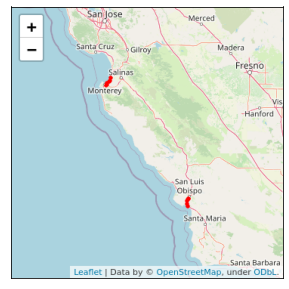

samiul_i75 ['10026', '9829', '9828', '9892', '9825', '9831', '9823', '9822', '9830', '9834', '9824', '9835']


<Figure size 432x288 with 0 Axes>

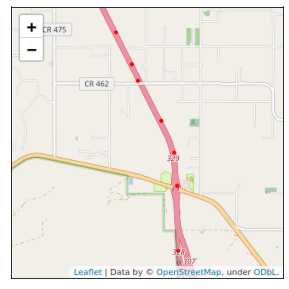

pems_d5 [501016071, 501016072, 500010121, 500010122, 500011021, 500011022, 500011032, 500011033, 501016091, 501016092, 500010142, 500010143, 501016101, 501016102, 500011052, 500011053, 501016122, 501016123, 501016131, 501016132, 501016142, 501016143, 500010092, 500010093]


<Figure size 432x288 with 0 Axes>

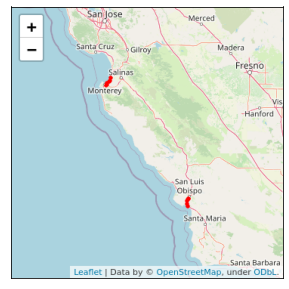

samiul_i75 ['10026', '9829', '9828', '9892', '9825', '9831', '9823', '9822', '9830', '9834', '9824', '9835']


<Figure size 432x288 with 0 Axes>

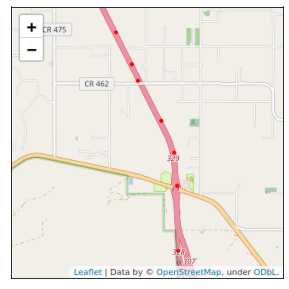

In [62]:
# let us see which ids
from itertools import product
from glob import glob
    
for exp_id,source_data in product(['n3_3','n3_4'],['pems_d5','samiul_i75']):
    if source_data=='samiul_i75':
        filetype='csv'
    else:
        filetype='parquet'
    rd = ritis.RITISDetector(source_data)
    rd = rd.load_raw(kind=['zone'],filetype=filetype)
    rd.filter_by_common_id()
    
    expdata_home = os.path.normpath(os.path.join(os.path.expanduser('~'),'traffic_flow_exp','data',exp_id))
    n_cols = [1,3]
    n_aggs = [5,10,15]
    


    folders = []
    for n_col,n_agg in product(n_cols,n_aggs):
        datafolders = glob(os.path.join(expdata_home, '{}-*-{}-{}'.format(source_data,
                                                                          n_col,n_agg),'id_list.json'))
        folders.extend(datafolders)
    #display(folders)
    id_list = []
    for filename in folders:
        id_list.extend(dict_util.DictObj(filename)['id_list'])
    id_list = list(set(id_list))
    print(source_data,id_list)
    map_df = rd.df.meta.query('id in @id_list').loc[:,['id','lat','lon']]
    fmap = vis_util.map_with_folium(map_df)
    filename='data_prep_verify.png'
    fpng = vis_util.folium_to_png(fmap,filename)
    vis_util.show_image_file(filename,width = 5, height = 5)